### Load the Dataset

In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('motor_insurance_data.csv')

# Display the first few rows
display(df.head())

,Age,Gender,Occupation,Years_Driving,Annual_Mileage,Claims_Frequency,Claim_Severity,Traffic_Violations,Vehicle_Age,Vehicle_Type,Location,Risk_Level
0,56,Female,Engineer,29,5827,1,1397.262847,1,19,Motorcycle,Rural,Low
1,69,Male,Student,4,14699,1,642.023156,1,5,Truck,Rural,Low
2,46,Female,Driver,5,5524,0,591.985353,1,2,Motorcycle,Urban,Low
3,32,Female,Teacher,11,16193,0,7.121833,1,7,Truck,Rural,Low
4,60,Male,Teacher,21,26883,0,1711.460843,1,3,Truck,Urban,Low


### Preprocess the Data

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Features and target
X = df.drop(columns=['Risk_Level'])
y = df['Risk_Level']

# Preprocessing
numeric_features = ['Age', 'Years_Driving', 'Annual_Mileage', 'Claims_Frequency', 'Claim_Severity', 'Traffic_Violations', 'Vehicle_Age']
categorical_features = ['Gender', 'Occupation', 'Vehicle_Type', 'Location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Transform the data
X_processed = preprocessor.fit_transform(X)

### Implement Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=700, random_state=42)

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores):.2f})")

# Train the model
rf_model.fit(X_train, y_train)

# Test the model
test_accuracy = rf_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Cross-Validation Accuracy: 0.60 (+/- 0.01)
Test Accuracy: 0.57


### Implement DBSCAN for Customer Segmentation

In [23]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=20, min_samples=2)  # Adjust eps and min_samples as needed
df['Segment'] = dbscan.fit_predict(X_processed)

# Check the number of clusters (excluding noise, which is labeled as -1)
n_clusters = len(set(df['Segment'])) - (1 if -1 in df['Segment'] else 0)
print(f"Number of clusters: {n_clusters}")

Number of clusters: 1


### Visualize Customer Segmentation

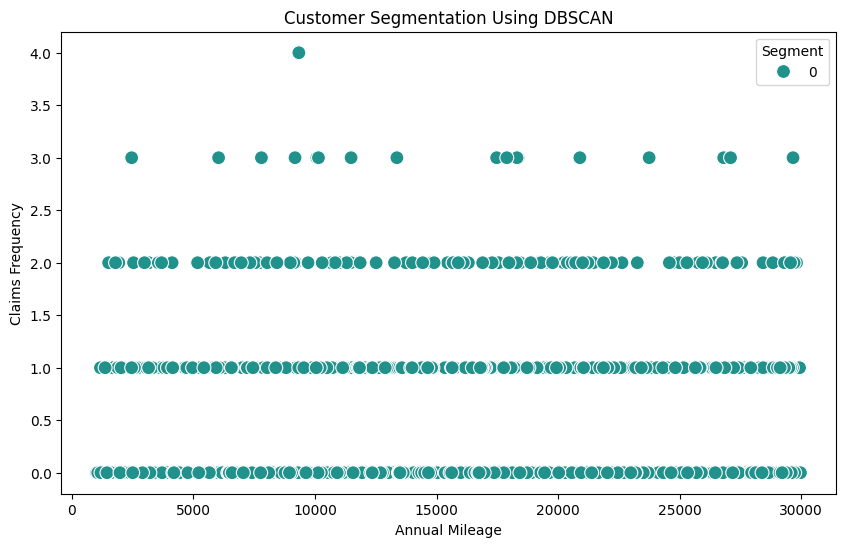

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot segmentation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Mileage', y='Claims_Frequency', hue='Segment', data=df, palette='viridis', s=100)
plt.title('Customer Segmentation Using DBSCAN')
plt.xlabel('Annual Mileage')
plt.ylabel('Claims Frequency')
plt.legend(title='Segment')
plt.show()

###  Analyze the Results

In [25]:
feature_importances = rf_model.feature_importances_
feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False))

                    Feature  Importance
4            Claim_Severity    0.147797
2            Annual_Mileage    0.147721
0                       Age    0.130074
1             Years_Driving    0.129570
6               Vehicle_Age    0.108799
5        Traffic_Violations    0.055436
3          Claims_Frequency    0.041883
15         Vehicle_Type_SUV    0.019586
8               Gender_Male    0.019432
11      Occupation_Engineer    0.019195
7             Gender_Female    0.018881
16       Vehicle_Type_Sedan    0.018703
10        Occupation_Driver    0.018495
12       Occupation_Student    0.018467
17       Vehicle_Type_Truck    0.018319
18           Location_Rural    0.018193
13       Occupation_Teacher    0.017820
19           Location_Urban    0.017639
14  Vehicle_Type_Motorcycle    0.017450
9         Occupation_Doctor    0.016542


C:\Users\Jibin\AppData\Local\Temp\ipykernel_12604\2675934089.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


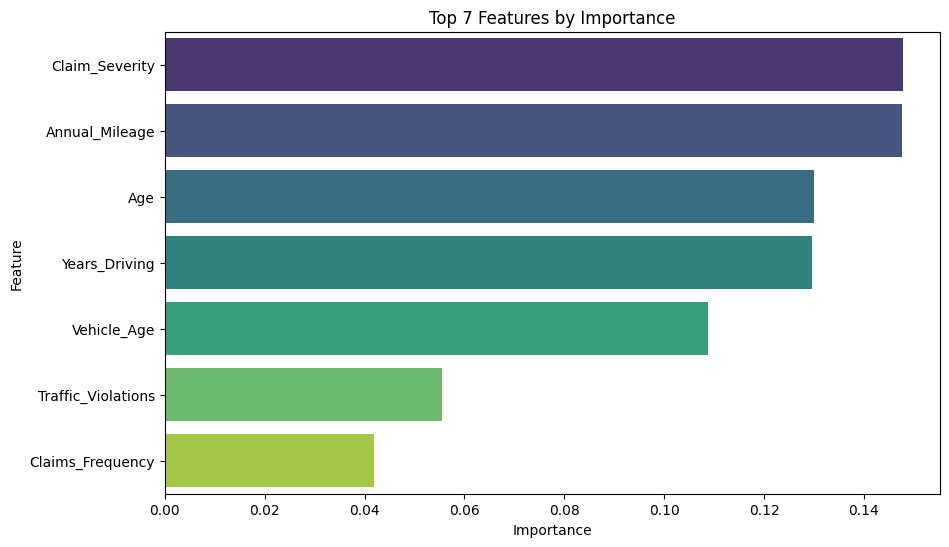

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the features by importance
top_features = importance_df.sort_values(by='Importance', ascending=False).head(7)

# Plot the top 7 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 7 Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()